# Assignment 6 Knock Airport Weather
## Assignment on Time Series
### Author: Gerry Callaghan


In [3]:
# We'll start with importing all our packages

# we'll need pandas for importing our data into dataframes
import pandas as pd

# We'll need numpy for various operations on our dataframes
import numpy as np

# We'll need datetime to reformat the dates for our data 
import datetime as dt

# We'll need matplotlib for charting our regressions
import matplotlib.pyplot as plt


Let's import the source csv file. <br/>
This file is from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv <br/>
it comes from this source: https://data.gov.ie/dataset/knock-airport-hourly-data/resource/d0aaf256-6854-4447-90bf-944b09105e40<br/>
so the various headers and legend keys can be read about on this site.

In [ ]:
# Read in our data from the URL down into the csv file, this is done as follows:
# Assign our URL variable the actual URL in a string format
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

# Before importing the CSV file into a dataframe, 
# download the csv from an internet browser and open it in a spreadsheet.
# In the spradsheet, I can see there are a lot of columns, 
# most of which we don't need for the objectives of this exercise.
# It also tells me that the data does not start until row 24.

# I will assign temporary names of "extras" so the superfluous columns 
# (I will be removing them shortly but this way, I can ensure our headings are aligned correctly with the values in the columns)
names = ["date","extra1","rain","extra2","temp","extra5","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]

# I pass in the URL string to the read_csv() function, 
# and set my dataframe df equal to the data, from "row 24" onwards,
# and on import assign the names to the relevant column names
df = pd.read_csv(url, header=None,names=names,skiprows=24)

# just to get a preview of that data
# print(f"{df.head()}\n")


                date  extra1 rain  extra2  temp  extra5  wetb  dewpt  vappr  \
0  10-apr-1996 14:00       0  0.0       0  11.5       0   8.1    3.9    0.0   
1  31-jul-1996 08:00       0  0.0       0  11.5       0  11.1   10.7    0.0   
2  31-jul-1996 09:00       0  0.0       0  11.6       0  10.7    9.8    0.0   
3  31-jul-1996 10:00       0  0.0       0  12.9       0  11.3    9.8    0.0   
4  31-jul-1996 11:00       0  0.0       0  14.5       0  10.8    7.0    0.0   

   rhum  ... extra4  wdsp wddir  ww   w  sun    vis  clht clamt cloud_amount  
0     0  ...      0     0     0  25  81  0.0  35000    32     5          NaN  
1     0  ...      0     0     0  25  82  0.0  40000    45     5          NaN  
2     0  ...      0     0     0  80  81  0.0   8000    32     7          NaN  
3     0  ...      0     0     0  25  82  0.0  28000    35     6          NaN  
4     0  ...      0     0     0   2  11  0.0  40000    40     6          NaN  

[5 rows x 22 columns]



/tmp/ipykernel_4374/1368991766.py:18: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None,names=names,skiprows=24)


In [3]:
# Now to drop those superfluous columns 
# I create a drop_col_list variable and assign it to the value of an array containing all the columns (series)
# I want to remove from our dataframe
drop_col_list = ['extra1', 'rain', 'extra2', 'extra5', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']

# now I will use the drop() function in pandas, setting the columns equal to our variable containing the list of columns to drop, 
# and selecting "in place" so it removes them in the source dataframe rather than create a copy of the dataframe.
df.drop(columns=drop_col_list, inplace=True)

# Now to view the list of columns
# I create a variable called headers, and assign it equal to the list of the columns before printing the value of the variable
headers = df.columns.tolist()
print(f"{headers}\n")

['date', 'temp']



In [4]:
# There are a lot of rows in this data, and because the preview does not give me a large preview,
# I will export it out to a csv where I can import it into a spreadsheet and view properly.
df.to_csv("knock_airport_data.csv")   

### Part 1a: Plot the Temperature
It should be noted that one of the columns contains dates (albeit in object type) and a second column contains the temperatures.

In [6]:
# Our first exercise is to confirm the type of series our date column is
print(f"{type(df["date"])}\n")

print(f"{df["date"]}\n")


<class 'pandas.core.series.Series'>

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
257149    30-nov-2025 20:00
257150    30-nov-2025 21:00
257151    30-nov-2025 22:00
257152    30-nov-2025 23:00
257153    01-dec-2025 00:00
Name: date, Length: 257154, dtype: object



In [7]:
# the date column is of type object. So, for time series, we must convert it to datetime (year, month, day) 
# using the dateime() function as follows:
df["date"]= pd.to_datetime(df['date'])

# just to confirm it is now of type datetime
print(f"{df["date"]}\n")

/tmp/ipykernel_4374/2409844406.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
257149   2025-11-30 20:00:00
257150   2025-11-30 21:00:00
257151   2025-11-30 22:00:00
257152   2025-11-30 23:00:00
257153   2025-12-01 00:00:00
Name: date, Length: 257154, dtype: datetime64[ns]



In [8]:
# given that I'm using timeseries data, I will make my Date column my index
df.set_index('date', inplace=True)

# to view the head of the dataframe
df.head(10)

,temp
date,
1996-04-10 14:00:00,11.5
1996-07-31 08:00:00,11.5
1996-07-31 09:00:00,11.6
1996-07-31 10:00:00,12.9
1996-07-31 11:00:00,14.5
1996-07-31 12:00:00,14.4
1996-07-31 13:00:00,14.9
1996-07-31 14:00:00,13.9
1996-07-31 15:00:00,13.2


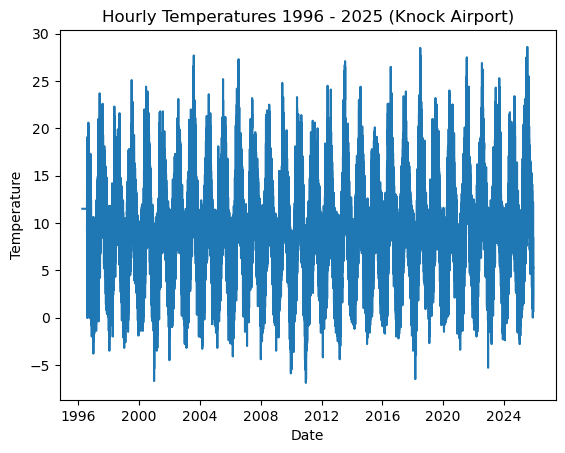

In [9]:
# Plotting the temperature.

# Using numpy to create two arrays, one for our dates and the other for our temperatures on each date(time)
x = np.array(df.index)
y = np.array(df["temp"])

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Hourly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()

### Part 1b: Plot the Mean Daily Temperature
To do this, I will use the resample() function to resample the mean hourly temperatures and calculate the mean daily temperatures based on the mean hourly temperatures.

In [10]:
# Resample allows us to break our dataframe into chunks and then plot the mean, sum etc. 

# In my case, to my new variable daily_mean_temp, I'm assigning it the value obtained
# by going to the temperature column "temp" and calculating its daily (indicated by a capital D in resample()) mean.

df_daily_mean_temp= df["temp"].resample("D").mean()
    
# I now print out a section of this to see that it looks right    
# print(f"{df_daily_mean_temp.head(20)}")

# I want to output to a csv file so i can assure myself it has done all the dates
df_daily_mean_temp.to_csv("mean_daily_temps_for_Knock2.csv") 


In [11]:
#print(f"{df_daily_mean_temp.index}")

# I have a lot of rows between April and August where there is just no data, so remove those rows between two dates using the drop () function
# I can do this using iloc on our index, which is the date. 
# as shown here https://stackoverflow.com/questions/71329396/drop-rows-by-index-with-date-index
df_daily_mean_temp = df_daily_mean_temp.drop(df_daily_mean_temp.loc["1996-04-10":"1996-07-31"].index)

#update the values in my csv file
df_daily_mean_temp.to_csv("mean_daily_temps_for_Knock2.csv") 

# now to print my daily mean temperatures
# print(f"{df_daily_mean_temp}")

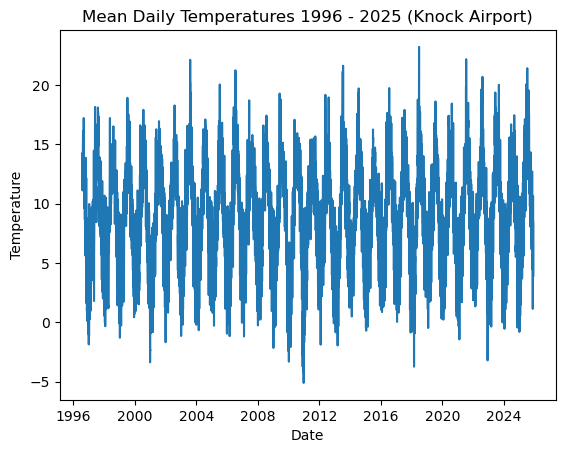

In [12]:
# Plotting the mean temperatures.

# Using numpy to create two arrays, one for our dates and the other for our mean daily temperatures
x = np.array(df_daily_mean_temp.index)
y = np.array(df_daily_mean_temp)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Daily Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()


### Part 1c: Plot the Mean Monthly Temperature
I will use a similar method to that I used for the mean daily temperature.<br/>
In that case, I used the resampler() function to get the mean across the hours data for each day.<br/>
Now, I have daily mean returns so I will use these figures to calculate the mean monthly returns.

In [13]:
# I was going to use Pandas groupby function to first group the data by year, then month,  
# and to calculate the mean temperatures for each month
# This method was inspired by Example 3 https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/ 
'''
df_aggregated_data2 = df_aggregated_data.groupby(["year", "month"]).agg(
    avg_mean_temp = ('avg_mean_temp', 'mean')
    
)
'''
# But I think the resample () function is a better method
df_monthly_mean_temp = df_daily_mean_temp.resample("M").mean()

#I want to output to a csv file so i can assure myself it has done all the dates
df_monthly_mean_temp.to_csv("mean_monthly_temps_for_Knock.csv")   


/tmp/ipykernel_4374/3656856869.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_mean_temp = df_daily_mean_temp.resample("M").mean()


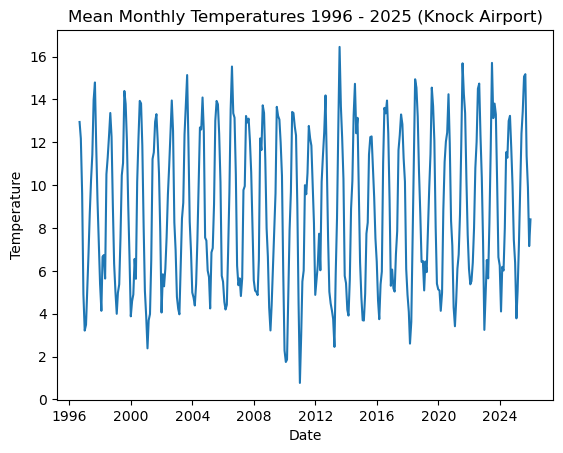

In [14]:
# Plotting the mean monthly temperatures.

# Using numpy to create two arrays, one for our dates and the other for our mean monthly temperatures
x = np.array(df_monthly_mean_temp.index)
y = np.array(df_monthly_mean_temp)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Mean Monthly Temperatures 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()


#### Part 2a: Plot the Windspeed

I originally removed this from our dataframe, so let's reintroduce the data from the source csv file.



In [5]:
# in this case, there are no real values for windspeed until 1am on Aug 1st, so let's ignore many of the first rows
# removing them as we did earlier
names = ["date","extra1","rain","extra2","temp","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]

# Read in our data from the URL down into the csv file, this is done as follows:
# Assign our URL variable the actual URL in a string format
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

df_wdsp = pd.read_csv(url, header=None,names=names,skiprows=42)


/tmp/ipykernel_4950/2359078905.py:9: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wdsp = pd.read_csv(url, header=None,names=names,skiprows=42)


In [6]:
# I will drop the superfluous columns 
# Create a drop_col_list variable and assign it to the value of an array containing all the columns (series) 
# we want to remove from our dataframe
drop_col_list = ['extra1', 'rain', 'extra2', "temp", 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']

# now use the drop function in pandas, setting the columns equal to the variable, 
# and selecting in place so it removes them in the source dataframe.
df_wdsp.drop(columns=drop_col_list, inplace=True)

# Let's view the list of columns
# Create a variable called headers, and assign it equal to the list of the columns before printing the value of the variable
headers = df_wdsp.columns.tolist()
print(f"{headers}\n")

['date', 'wdsp']



In [7]:
# There are missing data for 22:00 on August 1st, 1996, so let's interpolate across the rows using this method 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

#df.interpolate()
#df=df["wdsp"].fillna(method="ffill")

# the following method was pulled from https://stackoverflow.com/questions/52835971/fill-nan-with-zero-python-pandas
df_wdsp['wdsp'] = pd.to_numeric(df_wdsp['wdsp'], errors='coerce').fillna(0)

df_wdsp["wdsp"] = df_wdsp["wdsp"].astype(int)

#df.head(25)


                     date  wdsp
0       01-aug-1996 01:00     6
1       01-aug-1996 02:00     8
2       01-aug-1996 03:00     9
3       01-aug-1996 04:00     8
4       01-aug-1996 05:00     8
...                   ...   ...
257131  30-nov-2025 20:00    17
257132  30-nov-2025 21:00    14
257133  30-nov-2025 22:00    10
257134  30-nov-2025 23:00     6
257135  01-dec-2025 00:00     8

[257136 rows x 2 columns]


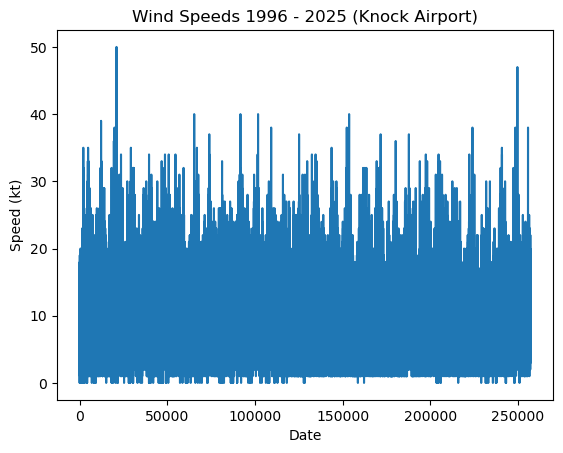

In [19]:
# Plotting the windspeed.

# Use numpy to create two arrays, one for our dates and the other for windspeed
# Because it takes a long time to render out the graph over the whole period, 

print(f"{df_wdsp}")

#my x-axis is the date
x = np.array(df_wdsp.index)

# my y-axis is the speed
y = np.array(df_wdsp["wdsp"])

plt.xlabel("Date")
plt.ylabel("Speed (kt)")
plt.title("Wind Speeds 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()



### Part 2b: Plot the Rolling Windspeed

In [21]:
df_wdsp =df_wdsp.iloc[0:24]

rolling_mean=df_wdsp["wdsp"].rolling(window=24).mean()
print(f"{rolling_mean}")

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23    9.708333
Name: wdsp, dtype: float64


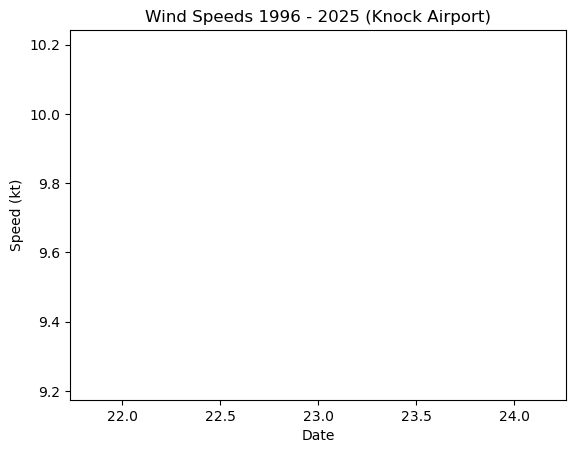

In [22]:
# Plotting the windspeed.

# We use numpy to create two arrays, one for our dates and the other for windspeed
# Because it takes a long time to render out the graph over the whole period, 
# I'm going to take a subset of the period
df_wdsp =df_wdsp.iloc[0:24]

x = np.array(df_wdsp.index)
y = np.array(rolling_mean)

plt.xlabel("Date")
plt.ylabel("Speed (kt)")
plt.title("Wind Speeds 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()



#### Part 6: Plot the maximum windspeed for each day

In [ ]:
df

In [ ]:
df_sample =df.iloc[0:48]

rolling_max=df_sample["wdsp"].rolling(window=24).max()
print(f"{rolling_max}")

In [ ]:
#df =df.iloc[0:24]

#rolling_mean=df["wdsp"].rolling(window=24).max()
#print(f"{rolling_mean}")

df["wdsp"] = df["wdsp"].astype(int)
df["wdsp"]

In [ ]:
df.index

In [ ]:
# Breaking out our date column into its constituent parts  
# This is based on https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

df = df.reset_index()
print(f"{df}") 
df["date"] = pd.to_datetime(df["date"])


df["year"] = df["date"].dt.year
print(f"{(df["year"].head())}\n")

df["month"] = df["date"].dt.month
print(f"{(df["month"].head())}\n")

df["day"] = df["date"].dt.day
print(f"{(df["day"].head())}\n")

df['time'] = df["date"].dt.time
print(f"{(df["time"].head(6))}\n")

# Now let's view all our columns
print(f"{(df.head(6))}\n")


In [ ]:
df = df.groupby(["year", "month", "day"]).agg(
    max_daily_windspeed = ('wdsp', 'max')
    
)
#df_max_daily_wind = df.resample("ME").mean()

In [ ]:
df

In [ ]:
# I want to output to a csv file so i can assure myself it has done all the dates
df.to_csv("max_daily_windspeed_for_Knock.csv") 

In [ ]:
# If I want my plot my daily maximums, I need a column containing daily dates, therefore i need to rejoin my year and month and day into one column.
#  Like before, I will use the concatenation function in Pandas to join the two columns as strings 
#df['daily_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))
#print(f"{df}\n")

In [ ]:
# Plotting the windspeed.

# We use numpy to create two arrays, one for our dates and the other for windspeed
# Because it takes a long time to render out the graph over the whole period, 
# I'm going to take a subset of the period
df_sample =df.iloc[0:24]

x = np.array(df_sample["day"])
y = np.array(df_sample["max_daily_windspeed"])

plt.xlabel("Date")
plt.ylabel("Speed (kt)")
plt.title("Wind Speeds 1996 - 2025 (Knock Airport)")

plt.plot(x,y)
plt.show()

